<a href="https://colab.research.google.com/github/Gabriel-Tosta/202302-uninove-flutter-aula07/blob/main/C%C3%B3pia_de_C%C3%B3pia_de_Revis%C3%A3o_Imagens_e_filtros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Como referencia utilize o Collab realizado em aula<br>
https://colab.research.google.com/github/storopoli/ciencia-de-dados/blob/main/notebooks/Aula_06_Numpy_Algebra_Linear.ipynb<br>


### Imagens e Filtros

Todo dado estruturado é representado como matrizes no computador. Veja o caso de imagens. Elas são literalmente matrizes multidimensionais.

* Uma imagem colorida é uma Array de dimensão $X \times Y \times 3$:
    * $X$ = quantidade de pixels no eixo horizontal
    * $Y$ = quantidade de pixels no eixo vertical
    * $3$ = são 3 canais de cores - **R**ed, **G**reen e **B**lue
    <br><br>

    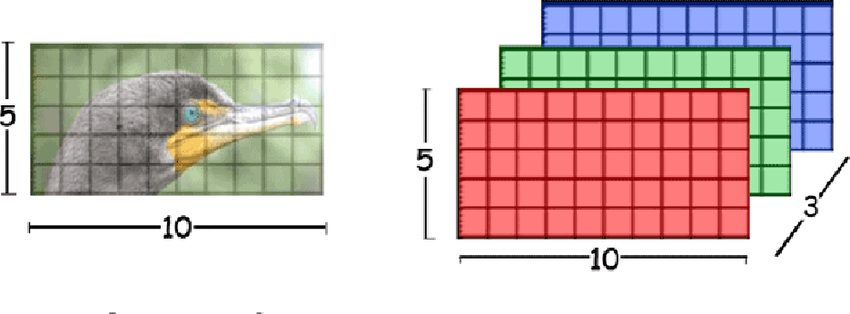

### Convolução
*É um processo que envolve aplicar um pequeno array de números, conhecido como **kernel** (ou **filtro**), sobre cada pixel da imagem, com o objetivo de produzir uma nova imagem onde cada pixel é uma soma ponderada dos pixels vizinhos no local correspondente da imagem original.<br><br>
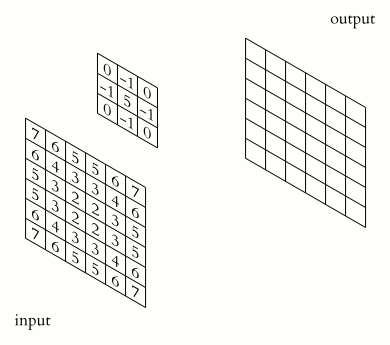


#Exercicio:
* carregue a imagem do barco colorido
* separe as 3 camadas RGB e mostre na tela
* mostre a imagem em P&B

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Carregar a imagem do barco colorido
# ATENÇÃO: Substitua 'barco_colorido.jpg' pelo nome real do seu arquivo.
try:
    img_colorida = cv2.imread('barco_colorido.jpg')

    if img_colorida is None:
        raise FileNotFoundError

    # O OpenCV carrega as imagens no formato BGR, não RGB.
    # Para exibição correta no Matplotlib, vamos converter
    img_rgb = cv2.cvtColor(img_colorida, cv2.COLOR_BGR2RGB)

    # Exibe a imagem original
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 4, 1)
    plt.imshow(img_rgb)
    plt.title('Imagem Original (RGB)')
    plt.axis('off')

except FileNotFoundError:
    print("ERRO: Não foi possível carregar a imagem. Certifique-se de que 'barco_colorido.jpg' está no diretório correto e o nome do arquivo está correto.")
    exit()

* aplique na imagem original a detecção de borda
* aplique na imagem em P&B a detecção de borda
##### Detecção de Bordas (*Edge Detection*)

$$
\left[\begin{array}{lll}
{-1} & {-1} & {-1} \\
{-1} & {+8} & {-1} \\
{-1} & {-1} & {-1}
\end{array}\right]
$$




In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

try:
    img_colorida = cv2.imread('barco_colorido.jpg')

    if img_colorida is None:
        raise FileNotFoundError

    img_rgb = cv2.cvtColor(img_colorida, cv2.COLOR_BGR2RGB)
    img_pb = cv2.cvtColor(img_colorida, cv2.COLOR_BGR2GRAY)

except FileNotFoundError:
    print("ERRO: Não foi possível carregar a imagem. Certifique-se de que 'barco_colorido.jpg' está no diretório correto e o nome do arquivo está correto.")
    exit()

# Definir o kernel de detecção de bordas
kernel = np.array([
    [-1, -1, -1],
    [-1,  8, -1],
    [-1, -1, -1]
])

# Aplicar a detecção de bordas na imagem original (colorida)
bordas_colorida = cv2.filter2D(img_colorida, -1, kernel)

# Aplicar a detecção de bordas na imagem em P&B
bordas_pb = cv2.filter2D(img_pb, -1, kernel)

# Exibição dos resultados
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Imagem Original')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(bordas_colorida, cv2.COLOR_BGR2RGB))
plt.title('Detecção de Bordas (Colorida)')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.imshow(bordas_pb, cmap='gray')
plt.title('Detecção de Bordas (P&B)')
plt.axis('off')

plt.show()

* aplique o filtro de sorbel na imagem original tanto no contexto horizontal e vertical
* reaplique na imagem P&B<br><br>
####Filtro de Sobel ou SOperador Sobel enfatiza as bordas da imagem ( vetores Gradientes)<br>
$$\mathbf{G}_{\text{vertical}} = \begin{bmatrix}
 +1 & 0 & -1  \\
+2 & 0 & -2 \\
+1 & 0 & -1
\end{bmatrix}
\quad
\mbox{e}
\quad   
\mathbf{G}_{\text{horizontal}} = \begin{bmatrix}
 +1 & +2 & +1\\
 0 & 0 & 0 \\
-1 & -2 & -1
\end{bmatrix}$$

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


try:

    img_colorida = cv2.imread('barco_colorido.jpg')

    if img_colorida is None:
        raise FileNotFoundError

    img_rgb = cv2.cvtColor(img_colorida, cv2.COLOR_BGR2RGB)
    img_pb = cv2.cvtColor(img_colorida, cv2.COLOR_BGR2GRAY)

except FileNotFoundError:
    print("ERRO: Não foi possível carregar a imagem. Certifique-se de que 'barco_colorido.jpg' está no diretório correto.")
    exit()


kernel_sobel_vertical = np.array([
    [+1, 0, -1],
    [+2, 0, -2],
    [+1, 0, -1]
], dtype=np.float32)

kernel_sobel_horizontal = np.array([
    [+1, +2, +1],
    [ 0,  0,  0],
    [-1, -2, -1]
], dtype=np.float32)



sobel_v_colorida = cv2.filter2D(img_colorida, cv2.CV_64F, kernel_sobel_vertical)
sobel_h_colorida = cv2.filter2D(img_colorida, cv2.CV_64F, kernel_sobel_horizontal)

sobel_magnitude_colorida = np.sqrt(sobel_v_colorida**2 + sobel_h_colorida**2)
sobel_colorida = cv2.normalize(sobel_magnitude_colorida, None, 0, 255, cv2.NORM_MINMAX)
sobel_colorida = np.uint8(sobel_colorida)
sobel_colorida_rgb = cv2.cvtColor(sobel_colorida, cv2.COLOR_BGR2RGB)



sobel_v_pb = cv2.filter2D(img_pb, cv2.CV_64F, kernel_sobel_vertical)
sobel_h_pb = cv2.filter2D(img_pb, cv2.CV_64F, kernel_sobel_horizontal)

sobel_combinado_pb = cv2.magnitude(sobel_v_pb, sobel_h_pb)
sobel_combinado_pb = cv2.normalize(sobel_combinado_pb, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)

sobel_v_pb_abs = cv2.convertScaleAbs(sobel_v_pb)
sobel_h_pb_abs = cv2.convertScaleAbs(sobel_h_pb)



plt.figure(figsize=(20, 8))

plt.subplot(2, 4, 1)
plt.imshow(img_rgb)
plt.title('Original (Colorida)')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(cv2.cvtColor(sobel_v_colorida, cv2.COLOR_BGR2RGB))
plt.title('Sobel Vertical (Color)')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(cv2.cvtColor(sobel_h_colorida, cv2.COLOR_BGR2RGB))
plt.title('Sobel Horizontal (Color)')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(sobel_colorida_rgb)
plt.title('Sobel Magnitude (Color)')
plt.axis('off')


plt.subplot(2, 4, 5)
plt.imshow(img_pb, cmap='gray')
plt.title('Original (P&B)')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(sobel_v_pb_abs, cmap='gray')
plt.title('Sobel Vertical (P&B)')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(sobel_h_pb_abs, cmap='gray')
plt.title('Sobel Horizontal (P&B)')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.imshow(sobel_combinado_pb, cmap='gray')
plt.title('Sobel Magnitude (P&B)')
plt.axis('off')

plt.tight_layout()
plt.show()

ERRO: Não foi possível carregar a imagem. Certifique-se de que 'barco_colorido.jpg' está no diretório correto.


error: OpenCV(4.12.0) /io/opencv/modules/imgproc/src/filter.dispatch.cpp:1527: error: (-215:Assertion failed) !_src.empty() in function 'filter2D'


* Aumente a Nitidez (Sharpening) na imagem original
* Aumente a Nitidez (Sharpening) na imagem P&B


##### Aumento de Nitidez (*Sharpen*)

$$
\left[\begin{array}{lll}
{0} & {-1} & {0} \\
{-1} & {+5} & {-1} \\
{0} & {-1} & {0}
\end{array}\right]
$$

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


try:

    img_colorida = cv2.imread('barco_colorido.jpg')

    if img_colorida is None:
        raise FileNotFoundError

    img_rgb = cv2.cvtColor(img_colorida, cv2.COLOR_BGR2RGB)
    img_pb = cv2.cvtColor(img_colorida, cv2.COLOR_BGR2GRAY)

except FileNotFoundError:
    print("ERRO: Não foi possível carregar a imagem. Certifique-se de que 'barco_colorido.jpg' está no diretório correto.")
    exit()


kernel_sharpening = np.array([
    [ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]
], dtype=np.float32)


sharpened_colorida = cv2.filter2D(img_colorida, -1, kernel_sharpening)


sharpened_colorida_rgb = cv2.cvtColor(sharpened_colorida, cv2.COLOR_BGR2RGB)



sharpened_pb = cv2.filter2D(img_pb, -1, kernel_sharpening)



plt.figure(figsize=(15, 7))


plt.subplot(2, 3, 1)
plt.imshow(img_rgb)
plt.title('Original (Colorida)')
plt.axis('off')


plt.subplot(2, 3, 4)
plt.imshow(img_pb, cmap='gray')
plt.title('Original (P&B)')
plt.axis('off')



* Aplique agora o desfoque (BLUR) na imagem original
* Aplique agora o desfoque (BLUR) na imagem P&B

##### Desfoque (*Blur*)

$$
\frac{1}{16}
\left[\begin{array}{lll}
1 & 2 & 1 \\
2 & 4 & 2 \\
1 & 2 & 1
\end{array}\right]
$$

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


try:

    img_colorida = cv2.imread('barco_colorido.jpg')

    if img_colorida is None:
        raise FileNotFoundError

    img_rgb = cv2.cvtColor(img_colorida, cv2.COLOR_BGR2RGB)
    img_pb = cv2.cvtColor(img_colorida, cv2.COLOR_BGR2GRAY)

except FileNotFoundError:
    print("ERRO: Não foi possível carregar a imagem. Certifique-se de que 'barco_colorido.jpg' está no diretório correto.")
    exit()


kernel_blur = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
], dtype=np.float32) / 16.0
blurred_colorida = cv2.filter2D(img_colorida, -1, kernel_blur)


blurred_colorida_rgb = cv2.cvtColor(blurred_colorida, cv2.COLOR_BGR2RGB)



blurred_pb = cv2.filter2D(img_pb, -1, kernel_blur)



plt.figure(figsize=(15, 6))


plt.subplot(1, 3, 1)
plt.imshow(img_rgb)
plt.title('Original (Colorida)')
plt.axis('off')


plt.subplot(1, 3, 2)
plt.imshow(blurred_colorida_rgb)
plt.title('Desfoque Aplicado (Colorida)')
plt.axis('off')


plt.subplot(1, 3, 3)
plt.imshow(blurred_pb, cmap='gray')
plt.title('Desfoque Aplicado (P&B)')
plt.axis('off')

plt.tight_layout()
plt.show()

Conclusão:

Coloque aqui uma conclusão sobre os filtros aplicados a imagem